In [113]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [270]:
from ultralytics import YOLO

model = YOLO('models/model-seg.pt')  # load a pretrained model (recommended for training)

In [308]:
results = model('data/captiva.jpg')


image 1/1 /Users/javohirjalilov/github/cvProject/yolo-segmentation/data/captiva.jpg: 576x640 1 licence, 225.4ms
Speed: 2.7ms preprocess, 225.4ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


In [309]:
result = results[0]

In [339]:
mask = result.masks.data[0]

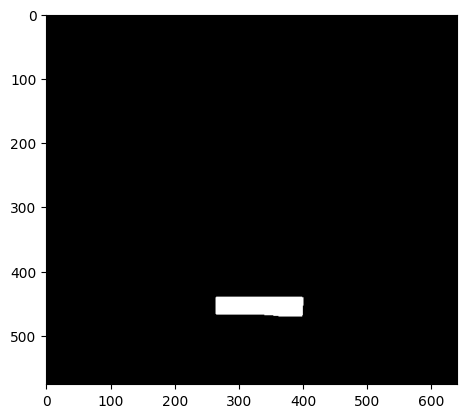

In [340]:
plt.imshow(mask, cmap='gray')
plt.show()

In [341]:
from utils import Segment

In [342]:
segment = Segment()

In [343]:
# torch tensor to numpy

mask = mask.cpu().detach().numpy()
mask = mask.astype(np.uint8)

In [344]:
# resize mask (865, 734)
import cv2
mask = cv2.resize(mask, (1280, 1103))

In [345]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)



In [346]:
peri = cv2.arcLength(contours[0], True)

approx = cv2.approxPolyDP(contours[0], 0.05*peri, True)

In [347]:
approx = [i[0].tolist() for i in approx]

In [348]:
print(approx)

[[528, 844], [530, 895], [799, 897], [797, 843]]


In [349]:
# approx = [[172, 444], [434, 485], [423, 542], [162, 501]]

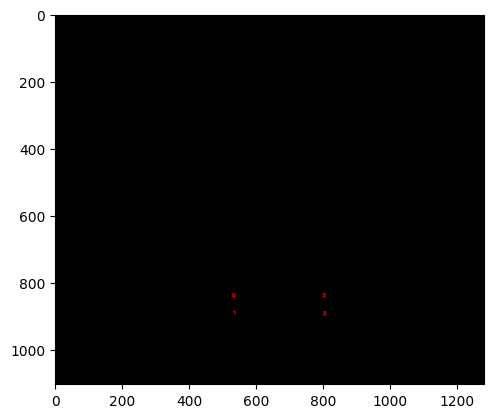

In [350]:
# draw contours
# mask gray to RGB
import matplotlib.pyplot as plt
mask_rgb = cv2.cvtColor(mask.copy(), cv2.COLOR_GRAY2RGB)

for i, p in enumerate(approx):
    x, y = p
    mask_rgb = cv2.putText(mask_rgb, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# show image
plt.imshow(mask_rgb)

In [351]:
mask_rgb.shape

(1103, 1280, 3)

In [352]:
from torchvision.transforms.functional import (_get_perspective_coeffs,
                                               to_tensor)

In [353]:
def warp(image, bounds, width: int = 208, height: int = 60):
        # Get the perspective matrix
        src_points = bounds
        dst_points = [[0, 0], [width, 0], [width, height], [0, height]]
        coeffs = _get_perspective_coeffs(src_points, dst_points)
        warpped = image.transform((width, height), Image.PERSPECTIVE, coeffs)

        return warpped

In [354]:
image = Image.open('data/captiva.jpg')


In [355]:
bounds = [approx[0], approx[3], approx[2], approx[1]]

In [356]:
plate = warp(image, bounds)

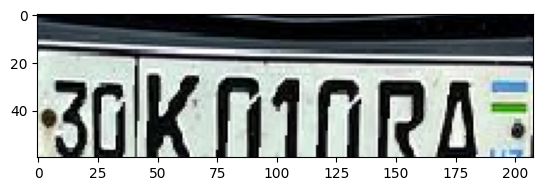

In [357]:
plt.imshow(plate)
plt.show()

In [358]:
image.size

(1280, 1103)